# 引入包

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 不平衡样本
from imblearn.under_sampling import RandomUnderSampler

# label2number
from sklearn.preprocessing import LabelEncoder, StandardScaler

# split
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# xgboost
from xgboost import XGBClassifier

# loss
from sklearn.metrics import log_loss

# one-hot
from sklearn.preprocessing import OneHotEncoder

#
from sklearn.decomposition import PCA

# 读取文件

In [33]:
train_data = pd.read_csv("../data/otto/train.csv")
train_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [34]:
train_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [35]:
train_data.shape, train_data.size

((61878, 95), 5878410)

In [36]:
train_data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

# seaborn图形可视化查看数据分布

<AxesSubplot: xlabel='target', ylabel='count'>

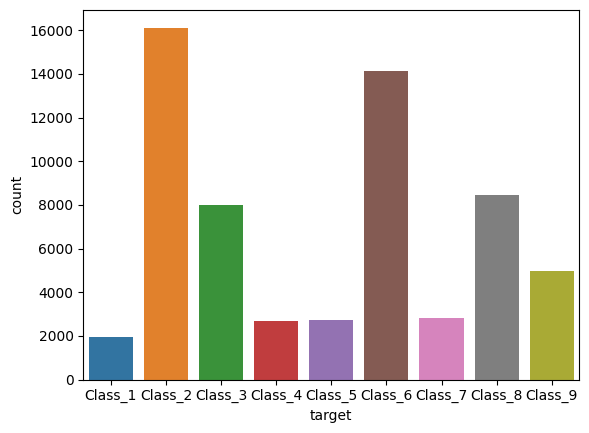

In [37]:
sns.countplot(x=train_data["target"])

<AxesSubplot: xlabel='target', ylabel='count'>

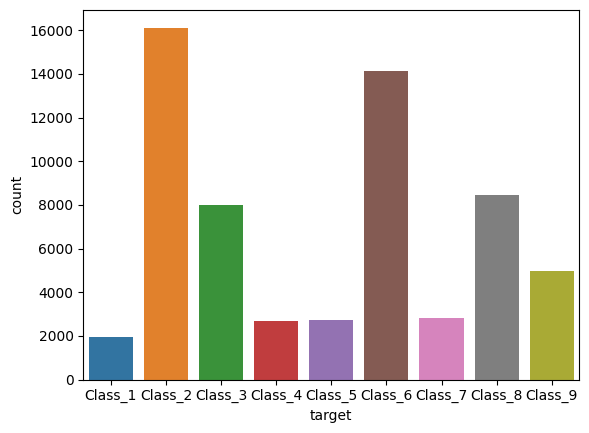

In [38]:
sns.countplot(train_data, x="target")

<AxesSubplot: xlabel='target', ylabel='Count'>

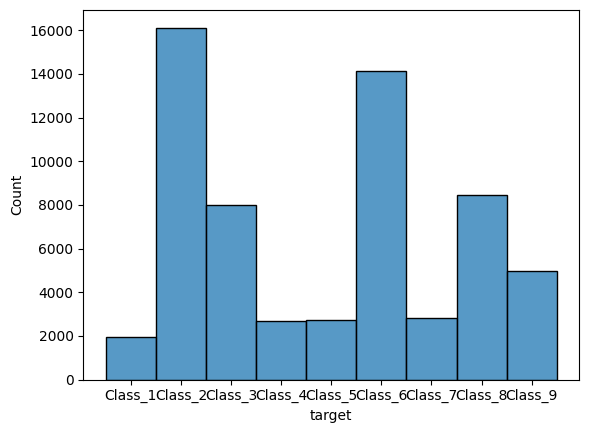

In [39]:
# 这样写不能加 hue="target"
sns.histplot(train_data["target"])

<AxesSubplot: xlabel='target', ylabel='Count'>

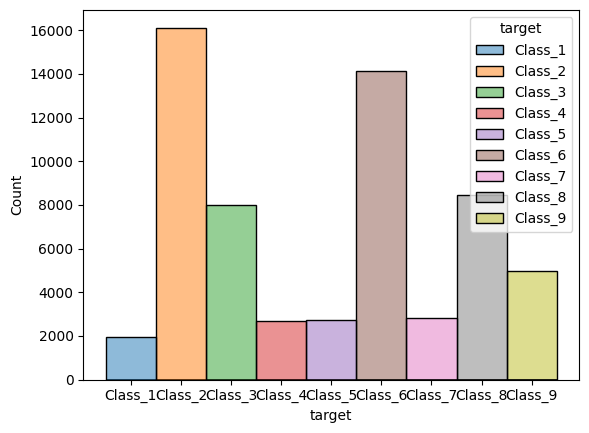

In [40]:
sns.histplot(train_data, x="target", hue="target")

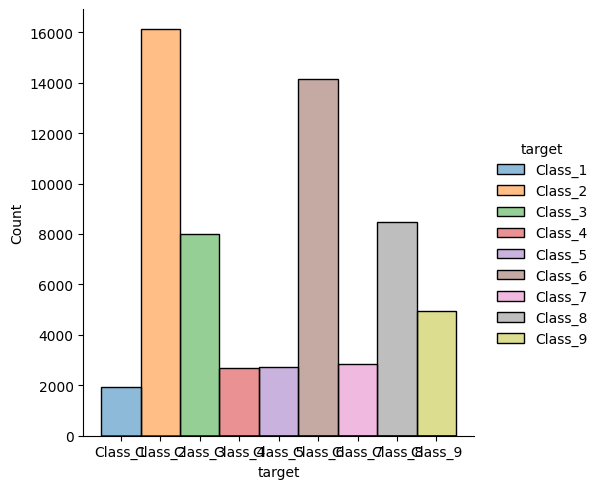

In [41]:
# 和上面的参数可以写一样
sns.displot(train_data, x="target", hue="target")

上图可以看出,该数据类别不均衡,所以需要后期处理
# 数据基本处理
数据已经经过脱敏,不需要特殊处理

## 截取部分数据

In [42]:
train_data1 = train_data[:1000]
train_data1.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

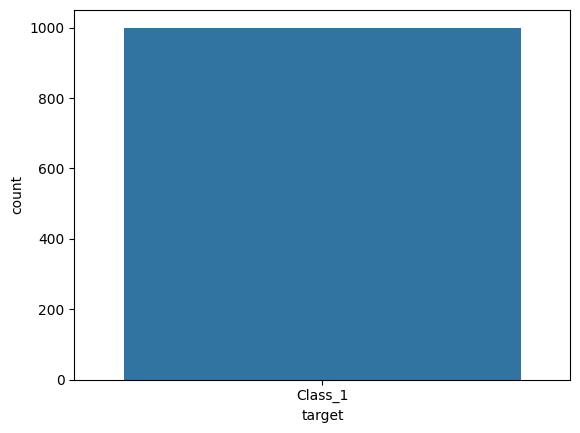

In [43]:
# 只有类别1
sns.countplot(train_data1, x="target")

## 使用随机欠采样获取数据

In [44]:
# 首先确定特征值/目标值
y = train_data["target"]
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [45]:
under = RandomUnderSampler(random_state=0)

In [46]:
train_data.shape, y.shape

((61878, 95), (61878,))

In [47]:
train_data_resampled, y_resampled = under.fit_resample(train_data, y)
train_data_resampled.shape, y_resampled.shape

((17361, 95), (17361,))

In [48]:
train_data_resampled.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

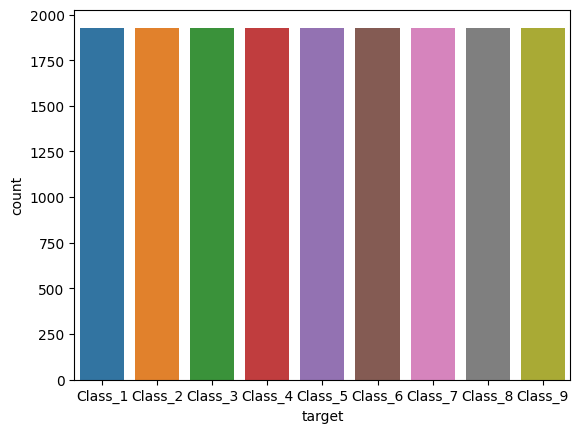

In [49]:
sns.countplot(x=train_data_resampled["target"])

In [50]:
# 去除id和target
x_resampled = train_data_resampled.drop(["id", "target"], axis=1)
x_resampled.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 目标标签值转换成数字 LabelEncoder

In [51]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [52]:
le = LabelEncoder()

In [53]:
y_resampled_num = le.fit_transform(y_resampled)
y_resampled_num

array([0, 0, 0, ..., 8, 8, 8])

## 分割数据 train_test_split

In [54]:
x_train, x_val, y_train, y_val = train_test_split(
    x_resampled, y_resampled_num, test_size=0.2, random_state=0
)

In [55]:
y_train.shape, y_val.shape

((13888,), (3473,))

<AxesSubplot: ylabel='count'>

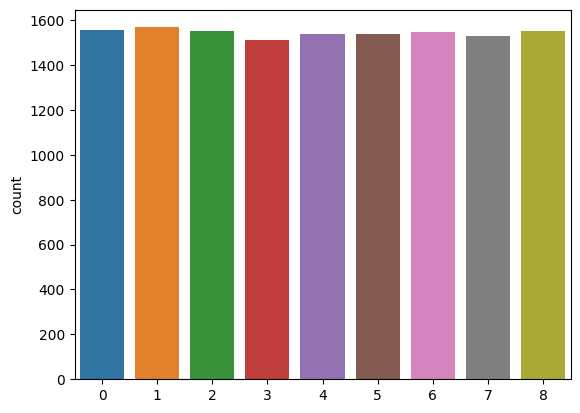

In [56]:
sns.countplot(x=y_train)
# 可以看到数据没有完全相等

<AxesSubplot: ylabel='count'>

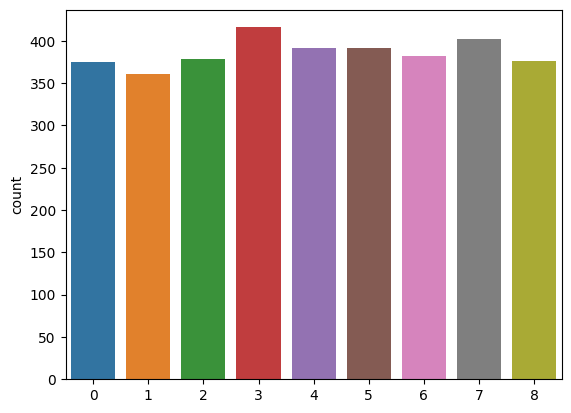

In [57]:
sns.countplot(x=y_val)

## 分割数据(使用StratifiedShuffleSplit)

In [58]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

In [59]:
for train_i, val_i in sss.split(x_resampled, y_resampled_num):
    # 测试能不能正常使用
    print(len(train_i))  # 13888
    print(len(val_i))  # 3473

    # x,y的训练和测试要一一对应
    # 获取验证集和测试集
    x_train_sss = x_resampled.values[train_i]
    x_val_sss = x_resampled.values[val_i]

    y_train_sss = y_resampled_num[train_i]
    y_val_sss = y_resampled_num[val_i]

x_train_sss.shape, x_val_sss.shape, y_train_sss.shape, y_val_sss.shape

13888
3473


((13888, 93), (3473, 93), (13888,), (3473,))

<AxesSubplot: ylabel='count'>

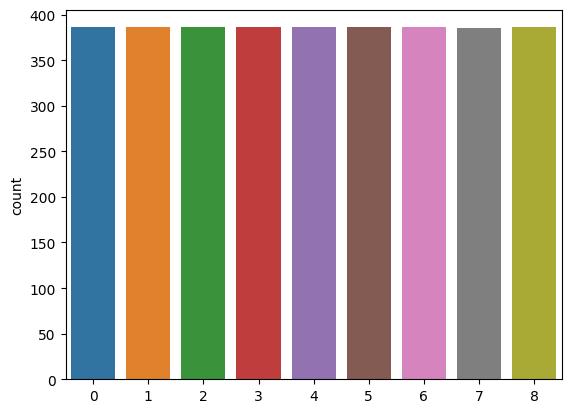

In [60]:
sns.countplot(x=y_val_sss)
# 数据严格分隔了

## 特征数据标准化StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(x_train_sss)

x_train_scaled = scaler.transform(x_train_sss)
x_val_scaled = scaler.transform(x_val_sss)

## PCA数据降维

In [63]:
pca = PCA(n_components=0.9)

In [64]:
pca.fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)

In [65]:
x_train_scaled.shape, x_train_pca.shape
# 93 -> 65

((13888, 93), (13888, 65))

### 降维数据可视化

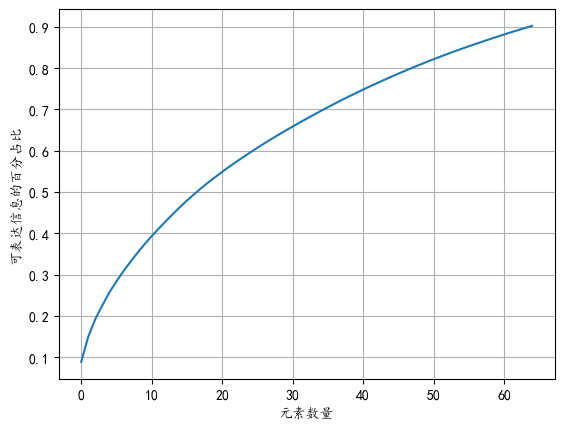

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("元素数量")
plt.ylabel("可表达信息的百分占比")
plt.grid()
# 解决中文显示问题
plt.rcParams["font.sans-serif"] = ["KaiTi"]  # 指定默认字体
plt.rcParams["axes.unicode_minus"] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.show()

# 模型训练

## 基本模型训练

In [67]:
xgb = XGBClassifier()

In [68]:
xgb.fit(x_train_pca, y_train_sss)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [69]:
xgb.score(x_val_pca, y_val_sss)

0.7440253383242154

In [70]:
y_predict = xgb.predict(x_val_pca)
y_predict

array([0, 8, 2, ..., 7, 0, 7], dtype=int64)

## 数据可视化
展示效果不是很好

<AxesSubplot: ylabel='count'>

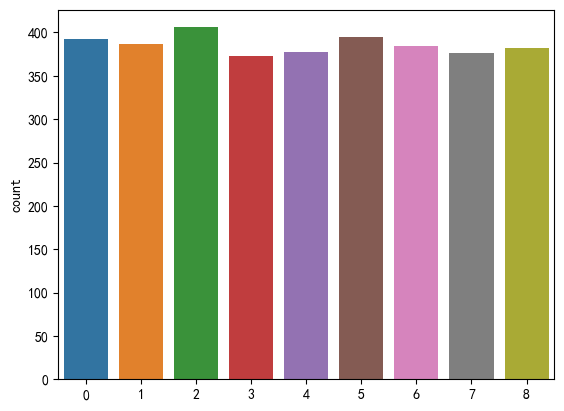

In [71]:
sns.countplot(x=y_predict)

## log_loss模型评估,越小越好

## 将数据修改为OneHot格式

In [56]:
one_hot = OneHotEncoder(sparse_output=False)

In [57]:
one_hot.fit(y_val_sss.reshape(-1, 1))

y_val_one_hot = one_hot.transform(y_val_sss.reshape(-1, 1))
y_predict_one_hot = one_hot.transform(y_predict.reshape(-1, 1))
y_val_one_hot, y_predict_one_hot

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

## predict_proba 改变预测值的输出模式,让输出结果为百分占比,降低log_loss值

In [60]:
y_pred_proba = xgb.predict_proba(x_val_pca)
# 结果全是百分比,并且类型是二维数组,就是onehot模式,直接使用即可
y_pred_proba

array([[5.1070726e-01, 2.4783604e-03, 3.1429707e-04, ..., 3.4927592e-01,
        7.9718521e-03, 2.3428025e-02],
       [5.6962408e-03, 7.7512395e-04, 1.7581736e-04, ..., 4.6927371e-04,
        5.5018405e-04, 9.9023461e-01],
       [2.6545342e-04, 8.0726393e-02, 8.8542175e-01, ..., 6.0417727e-03,
        6.8411078e-05, 3.2822114e-05],
       ...,
       [5.9105907e-02, 1.3743949e-04, 2.1115386e-04, ..., 2.5411790e-02,
        9.1192645e-01, 3.0514642e-03],
       [9.7969913e-01, 1.6824220e-03, 1.8240673e-03, ..., 1.0827549e-02,
        3.4850091e-03, 1.4226513e-03],
       [2.9839784e-05, 2.4042577e-04, 4.2600580e-04, ..., 1.8702997e-04,
        9.9733919e-01, 3.9203855e-04]], dtype=float32)

In [61]:
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.7358510025107224

# 模型调优
- n_estimators: 子树的数量
- max_features: 每个决策树的最大特征数量
- max_depth: 树的最大深度
- min_samples_leaf: 叶子节点的最小样本数


## n_estimators
n_estimators：integer，optional（default = 100） <br/>
在利用最大投票数或平均值来预测之前，你想要建立子树的数量。 森林里的树木数量120,200,300,500,800,1200


In [68]:
# 确定n_estimators取值范围
n_estimators_candidate = np.arange(300, 700, 50)
n_estimators_candidate

array([300, 350, 400, 450, 500, 550, 600, 650])

In [69]:
def turn_n_estimators(
    n_estimators_candidate: np.ndarray,
) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in n_estimators_candidate:
        print("*" * 50)
        print("n_estimators =", n)
        xgb = XGBClassifier(
            learning_rate=0.1,
            n_estimators=n,  # here
            max_depth=3,
            min_child_weight=1,
            subsample=1,
            colsample_bytree=1,
            objective="multi:softprob",
            n_jobs=-1,
            nthread=4,
            seed=42,
        )
        xgb.fit(x_train_pca, y_train_sss)

        # 预测得分
        score = xgb.score(x_val_pca, y_val_sss)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = xgb.predict_proba(x_val_pca)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [70]:
accuracys1, losses1 = turn_n_estimators(n_estimators_candidate)

**************************************************
n_estimators = 300
score = 0.7356752087532393
loss = 0.6929286302675333
**************************************************
n_estimators = 350
score = 0.7350993377483444
loss = 0.686949173496114
**************************************************
n_estimators = 400
score = 0.7388424992801612
loss = 0.6825742110231077
**************************************************
n_estimators = 450
score = 0.7374028217679239
loss = 0.6799066720011433
**************************************************
n_estimators = 500
score = 0.7365390152605816
loss = 0.6770949713941952
**************************************************
n_estimators = 550
score = 0.7365390152605816
loss = 0.6764860289580985
**************************************************
n_estimators = 600
score = 0.7382666282752663
loss = 0.6770196850585432
**************************************************
n_estimators = 650
score = 0.7402821767923985
loss = 0.6779891786562382


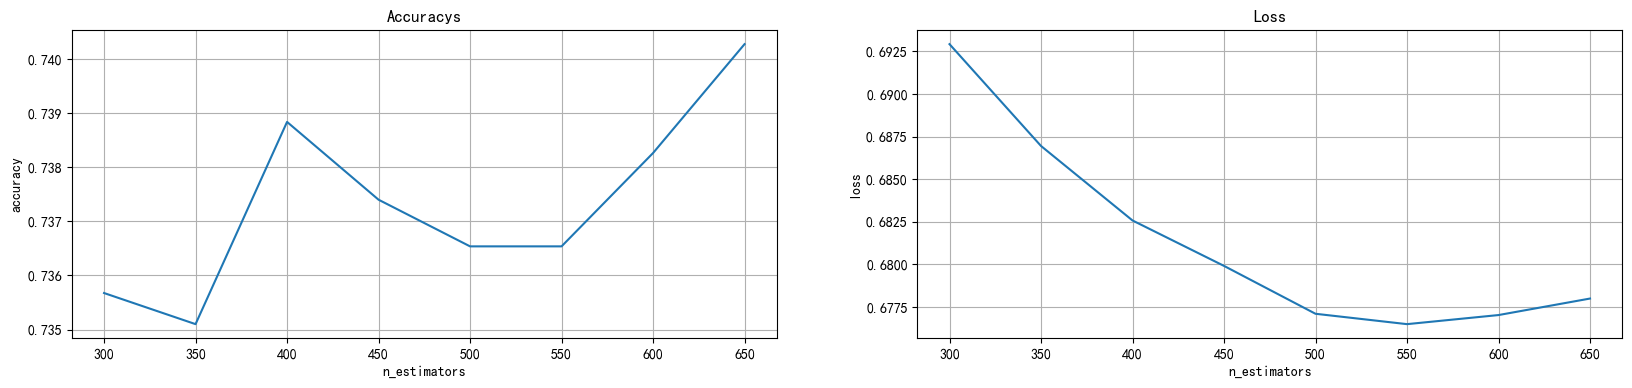

In [71]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(n_estimators_candidate, accuracys1)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("n_estimators")
axis[0].set_ylabel("accuracy")

axis[1].plot(n_estimators_candidate, losses1)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("n_estimators")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

### n_estimators=550 的时候表现效果不错

## max_depth

In [72]:
max_depth_candidate = [1, 3, 5, 7]

In [73]:
def turn_max_depth(max_depth_candidate: np.ndarray) -> tuple[list[float], list[float]]:
    accuracys = []
    losses = []
    for n in max_depth_candidate:
        print("*" * 50)
        print("max_depth =", n)
        xgb = XGBClassifier(
            learning_rate=0.1,
            n_estimators=550,
            max_depth=n,  # here
            min_child_weight=1,
            subsample=1,
            colsample_bytree=1,
            objective="multi:softprob",
            n_jobs=-1,
            nthread=4,
            seed=42,
        )
        xgb.fit(x_train_pca, y_train_sss)

        # 预测得分
        score = xgb.score(x_val_pca, y_val_sss)
        accuracys.append(score)
        print("score =", score)

        # 预测概率,需要one-hot编码
        y_pred_proba = xgb.predict_proba(x_val_pca)
        loss = log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)
        losses.append(loss)
        print("loss =", loss)

    return accuracys, losses

In [75]:
accuracys2, losses2 = turn_max_depth(max_depth_candidate)

**************************************************
max_depth = 1
score = 0.6999712064497553
loss = 0.8186474679210635
**************************************************
max_depth = 3
score = 0.7365390152605816
loss = 0.6764860289580985
**************************************************
max_depth = 5
score = 0.7494961128707169
loss = 0.7317822789101092
**************************************************
max_depth = 7
score = 0.7538151454074288
loss = 0.7886193690063121


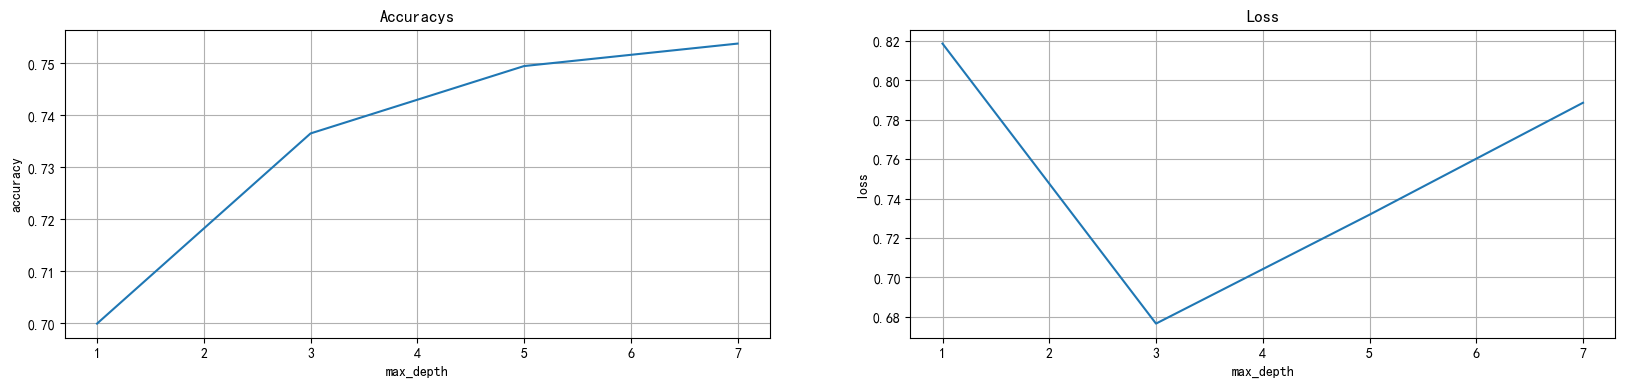

In [76]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), dpi=100)

axis[0].plot(max_depth_candidate, accuracys2)
axis[0].grid()
axis[0].set_title("Accuracys")
axis[0].set_xlabel("max_depth")
axis[0].set_ylabel("accuracy")

axis[1].plot(max_depth_candidate, losses2)
axis[1].grid()
axis[1].set_title("Loss")
axis[1].set_xlabel("max_depth")
axis[1].set_ylabel("loss")

plt.show()
plt.close()

## min_child_weights
## subsamples
## consample_bytrees
## etas(learning_rate)

# 确定最优模型


In [77]:
best_xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=550,
    max_depth=3,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7,
    nthread=4,
    seed=42,
    objective="multi:softprob",
)

In [78]:
best_xgb.fit(x_train_pca, y_train_sss)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=550, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [79]:
best_xgb.score(x_val_pca, y_val_sss)

0.7414339188021883

In [80]:
# 预测概率,需要one-hot编码
y_pred_proba = best_xgb.predict_proba(x_val_pca)
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.6707750416538438

# Test

In [82]:
test_data = pd.read_csv("../data/otto/test.csv")
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


## 去除id列

In [83]:
test_data_drop_id = test_data.drop("id", axis=1)
test_data_drop_id[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


## 特征数据标准化StandardScaler(训练数据标准化,测试数据也需要)

In [84]:
test_data_scaler = scaler.transform(test_data_drop_id)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## PCA数据降维(训练数据降维,测试数据也需要)

In [85]:
test_data_pca = pca.transform(test_data_scaler)

## 预测test数据结果

In [86]:
y_pred_test = best_xgb.predict(test_data_pca)
y_pred_test

array([3, 5, 5, ..., 2, 3, 2], dtype=int64)

In [87]:
y_pred_test.shape

(144368,)

## 对比其他得分

In [88]:
submission = pd.read_csv("../data/otto/submission.csv")
submission[:5]

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.034286,0.040000,0.060000,0.774107,0.000000,0.022857,0.040179,0.005714,0.022857
1,2,0.114286,0.040000,0.034286,0.034286,0.017143,0.485714,0.028571,0.217143,0.028571
2,3,0.005714,0.000000,0.000000,0.000000,0.000000,0.988571,0.000000,0.005714,0.000000
3,4,0.027714,0.215714,0.300000,0.277143,0.000000,0.000000,0.017143,0.006286,0.156000
4,5,0.237060,0.000080,0.005834,0.000000,0.005954,0.023057,0.018190,0.199658,0.510166


In [89]:
# 去除id列
submission_drop_id = submission.drop("id", axis=1)
submission_drop_id.shape

(144368, 9)

In [90]:
# 得到最大的得分id
result = np.argmax(submission_drop_id.values, axis=1)
result.shape

(144368,)

In [91]:
# 和另一个提交的结果相似率为 91%
np.equal(y_pred_test, result).sum() / result.size

0.792738002881525